In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
import sklearn.datasets._california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

fc = pd.read_csv("https://raw.githubusercontent.com/rygielcorpuz/machinelearning/main/fitness_class_2212.csv")

In [68]:
fc.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [69]:
# Check data types of all columns
data_types = fc.dtypes
categorical_attributes = data_types[data_types == 'object'].index.tolist()

print(data_types)
print(categorical_attributes)

booking_id            int64
months_as_member      int64
weight              float64
days_before           int64
day_of_week          object
time                 object
category             object
attended              int64
dtype: object
['day_of_week', 'time', 'category']


In [70]:
# Checking for null values in the DataFrame
missing_data = fc.isnull().sum()
print("Missing data:\n", missing_data)

Missing data:
 booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64


In [71]:
# It showed 20 missing values for 'weight'
# Input missing values with the mean of the "weight" column
fc['weight'].fillna(fc['weight'].mean(), inplace=True)

In [72]:
print("Missing data:\n", missing_data)

Missing data:
 booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64


In [73]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the columns you want to standardize (e.g., numeric columns)
columns_to_standardize = ['months_as_member', 'weight', 'days_before']

# Apply standardization to the selected columns
fc[columns_to_standardize] = scaler.fit_transform(fc[columns_to_standardize])

print(fc[columns_to_standardize])

      months_as_member    weight  days_before
0             0.106122 -0.240639    -0.085039
1            -0.435580 -0.284027    -1.556861
2             0.028736 -0.637446     1.386784
3            -0.822510  0.276867     0.405569
4            -0.048650 -1.050819    -0.085039
...                ...       ...          ...
1495          0.415666 -0.244583     0.405569
1496          1.034754  0.547454    -1.556861
1497         -0.512966  0.376266    -1.066254
1498          1.421684 -1.102097     1.386784
1499          0.338280  0.929272    -0.085039

[1500 rows x 3 columns]


In [74]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the columns you want to normalize (e.g., numeric columns)
columns_to_normalize = ['months_as_member', 'weight', 'days_before']

# Apply normalization to the selected columns
fc[columns_to_normalize] = scaler.fit_transform(fc[columns_to_normalize])

print(fc[columns_to_standardize])

      months_as_member    weight  days_before
0             0.108844  0.209799     0.250000
1             0.061224  0.205021     0.035714
2             0.102041  0.166102     0.464286
3             0.027211  0.266788     0.321429
4             0.095238  0.120580     0.250000
...                ...       ...          ...
1495          0.136054  0.209365     0.321429
1496          0.190476  0.296586     0.035714
1497          0.054422  0.277734     0.107143
1498          0.224490  0.114934     0.464286
1499          0.129252  0.338633     0.250000

[1500 rows x 3 columns]


In [75]:
# Calculate the mean and standard deviation for the attributes of interest
mean_values = fc[['months_as_member', 'weight', 'days_before']].mean()
std_values = fc[['months_as_member', 'weight', 'days_before']].std()

# Replace 'attribute1' and 'attribute2' with the names of the attributes you want to analyze

# Print the mean and standard deviation
print("Mean Values:")
print(mean_values)
print("\nStandard Deviation:")
print(std_values)

Mean Values:
months_as_member    0.099515
weight              0.236299
days_before         0.262381
dtype: float64

Standard Deviation:
months_as_member    0.087936
weight              0.110159
days_before         0.145641
dtype: float64


In [76]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model using your data
X = fc[['months_as_member', 'days_before']]
y = fc['weight']
model.fit(X, y)


LinearRegression()

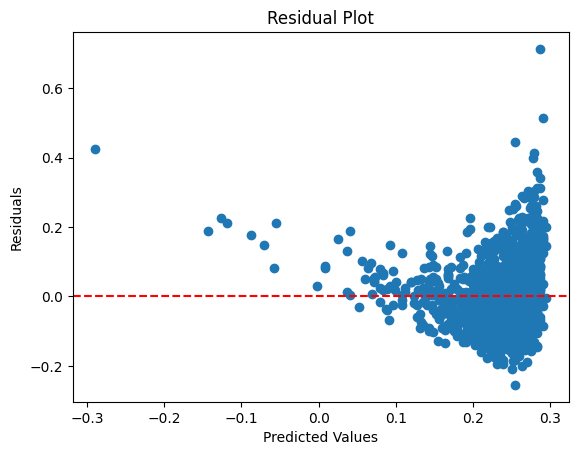

In [77]:
# Calculate the predicted values
predicted = model.predict(X)

# Calculate the residuals
residuals = y - predicted

# Create a residual plot
plt.scatter(predicted, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


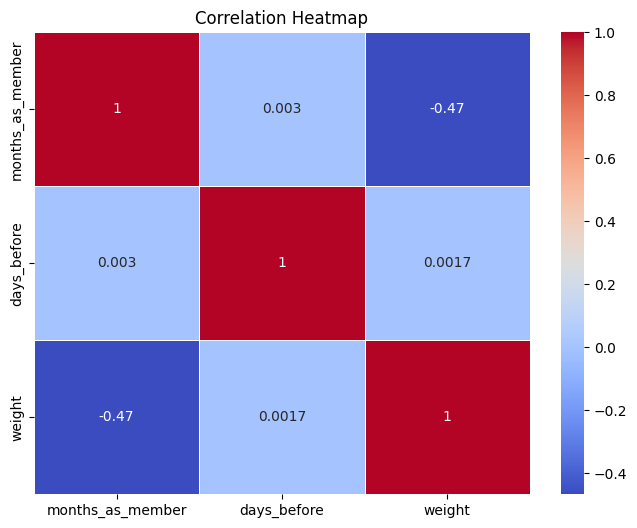

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the selected features and the target variable
data = fc[['months_as_member', 'days_before', 'weight']]

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


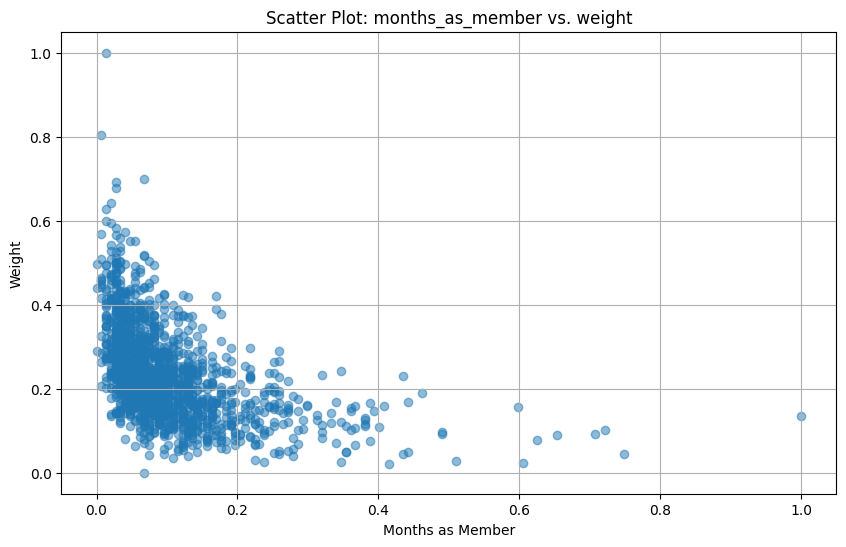

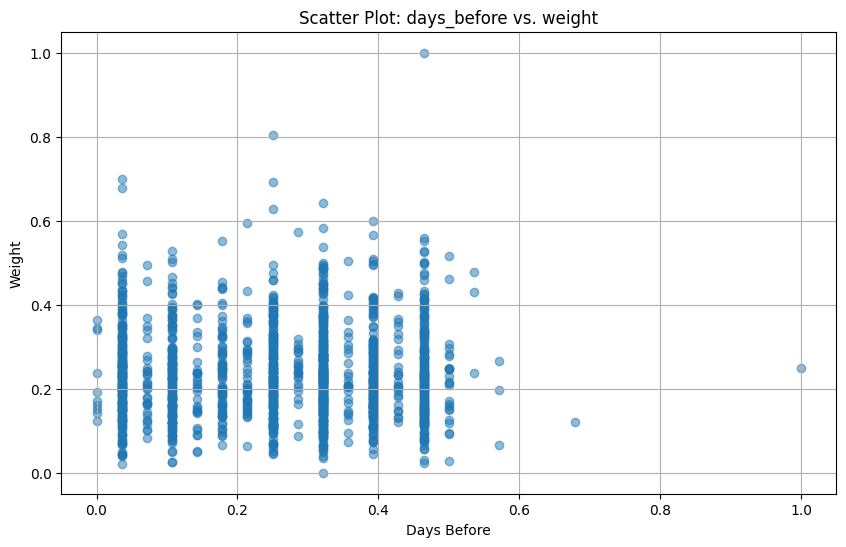

In [79]:
import matplotlib.pyplot as plt

# Create a scatter plot for 'months_as_member' vs 'weight'
plt.figure(figsize=(10, 6))
plt.scatter(fc['months_as_member'], fc['weight'], alpha=0.5)
plt.title('Scatter Plot: months_as_member vs. weight')
plt.xlabel('Months as Member')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

# Create a scatter plot for 'days_before' vs 'weight'
plt.figure(figsize=(10, 6))
plt.scatter(fc['days_before'], fc['weight'], alpha=0.5)
plt.title('Scatter Plot: days_before vs. weight')
plt.xlabel('Days Before')
plt.ylabel('Weight')
plt.grid(True)
plt.show()


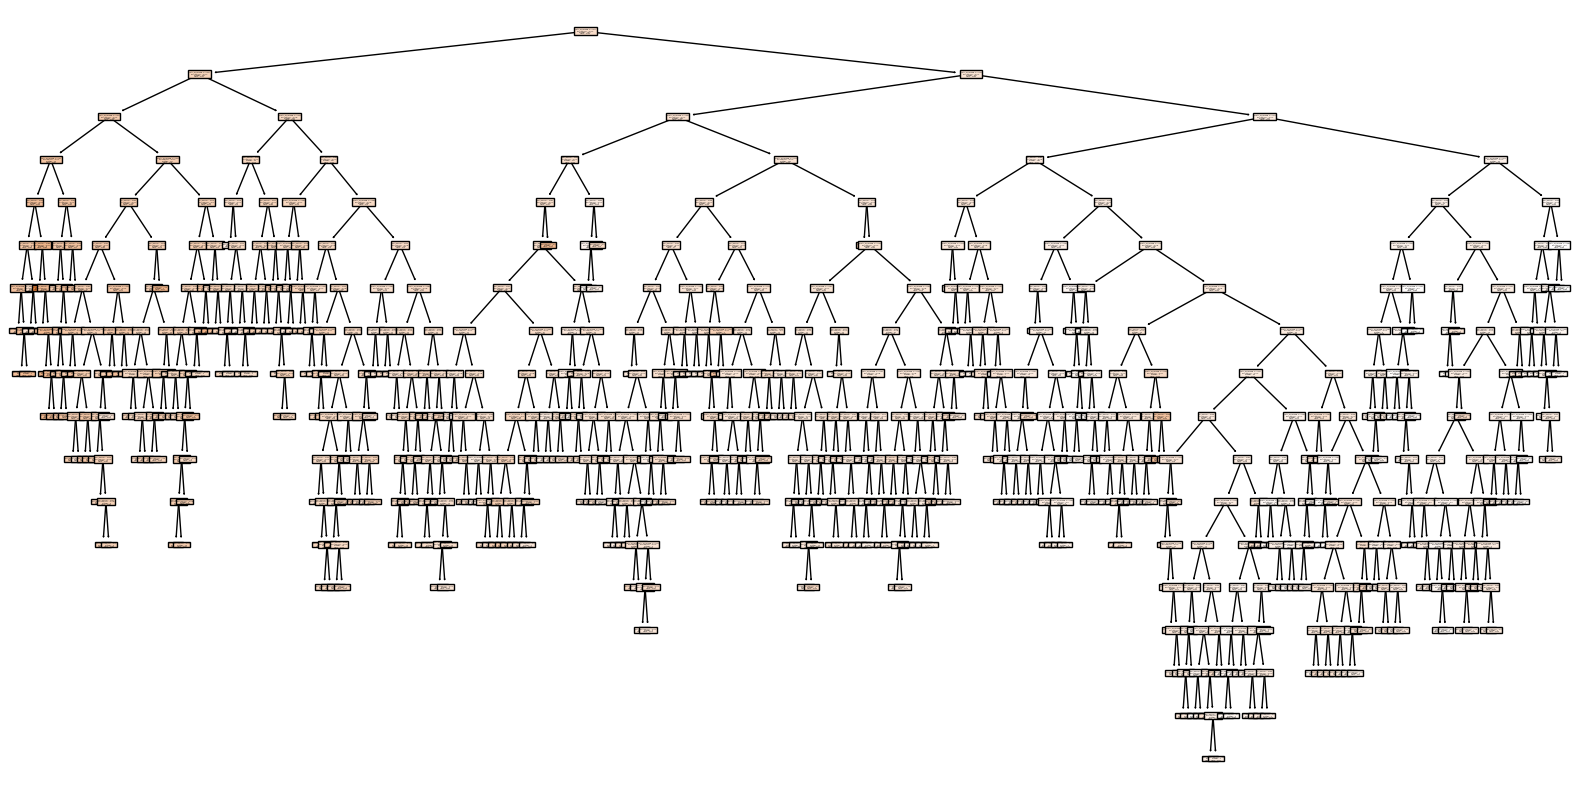

In [80]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Create a Decision Tree Classifier
dt_regressor = DecisionTreeRegressor()

# Fit the model to your data
dt_regressor.fit(X, y)  # X and y are your data and target variable

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, filled=True, feature_names=X.columns)  # Replace X.columns with your actual feature names
plt.show()


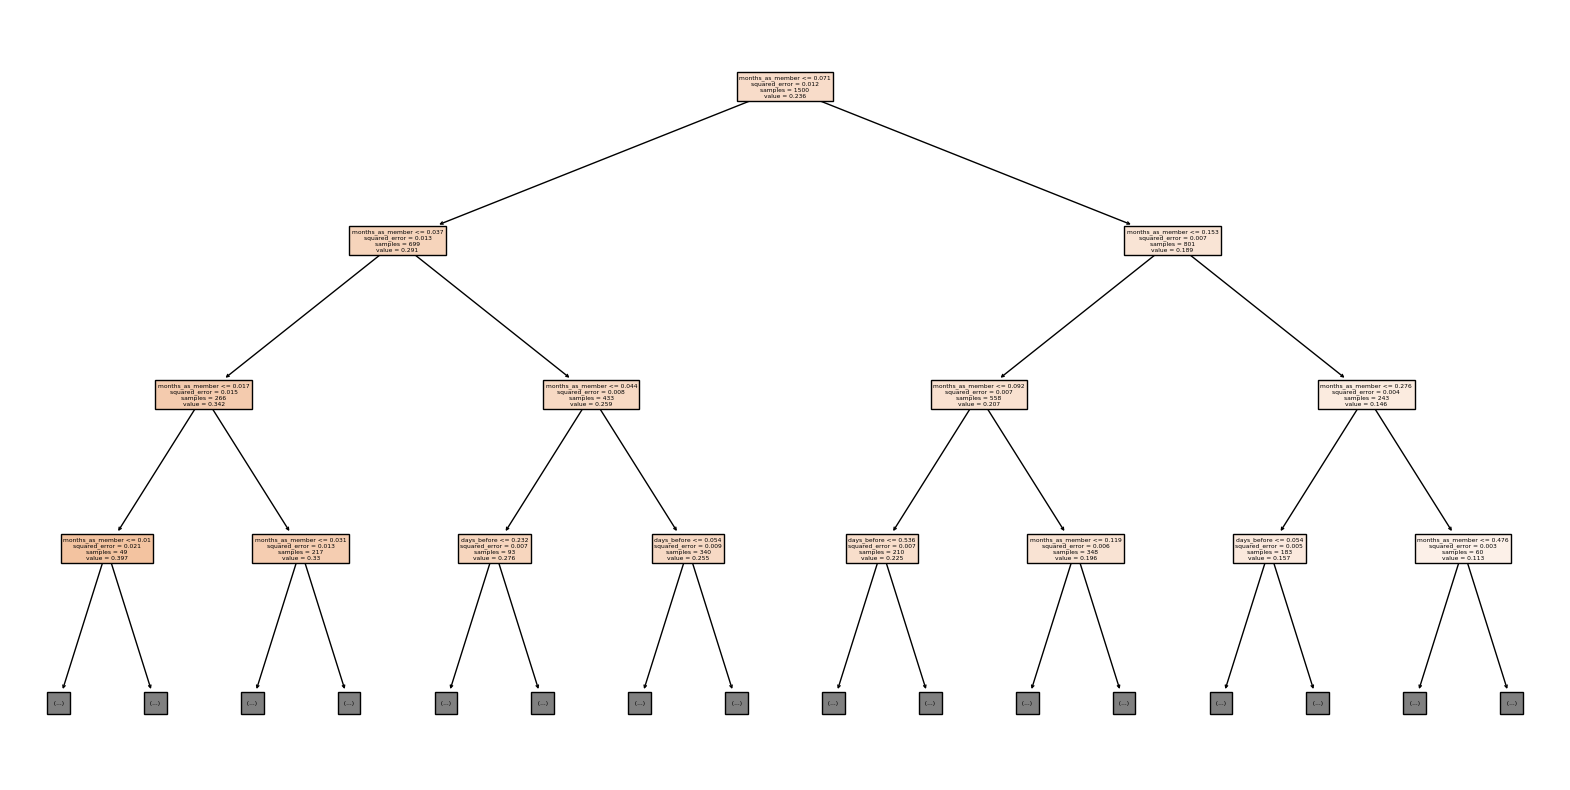

In [81]:
# Looking at the left most
plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, filled=True, feature_names=X.columns, max_depth=3)  # Limit the depth to 3
plt.show()

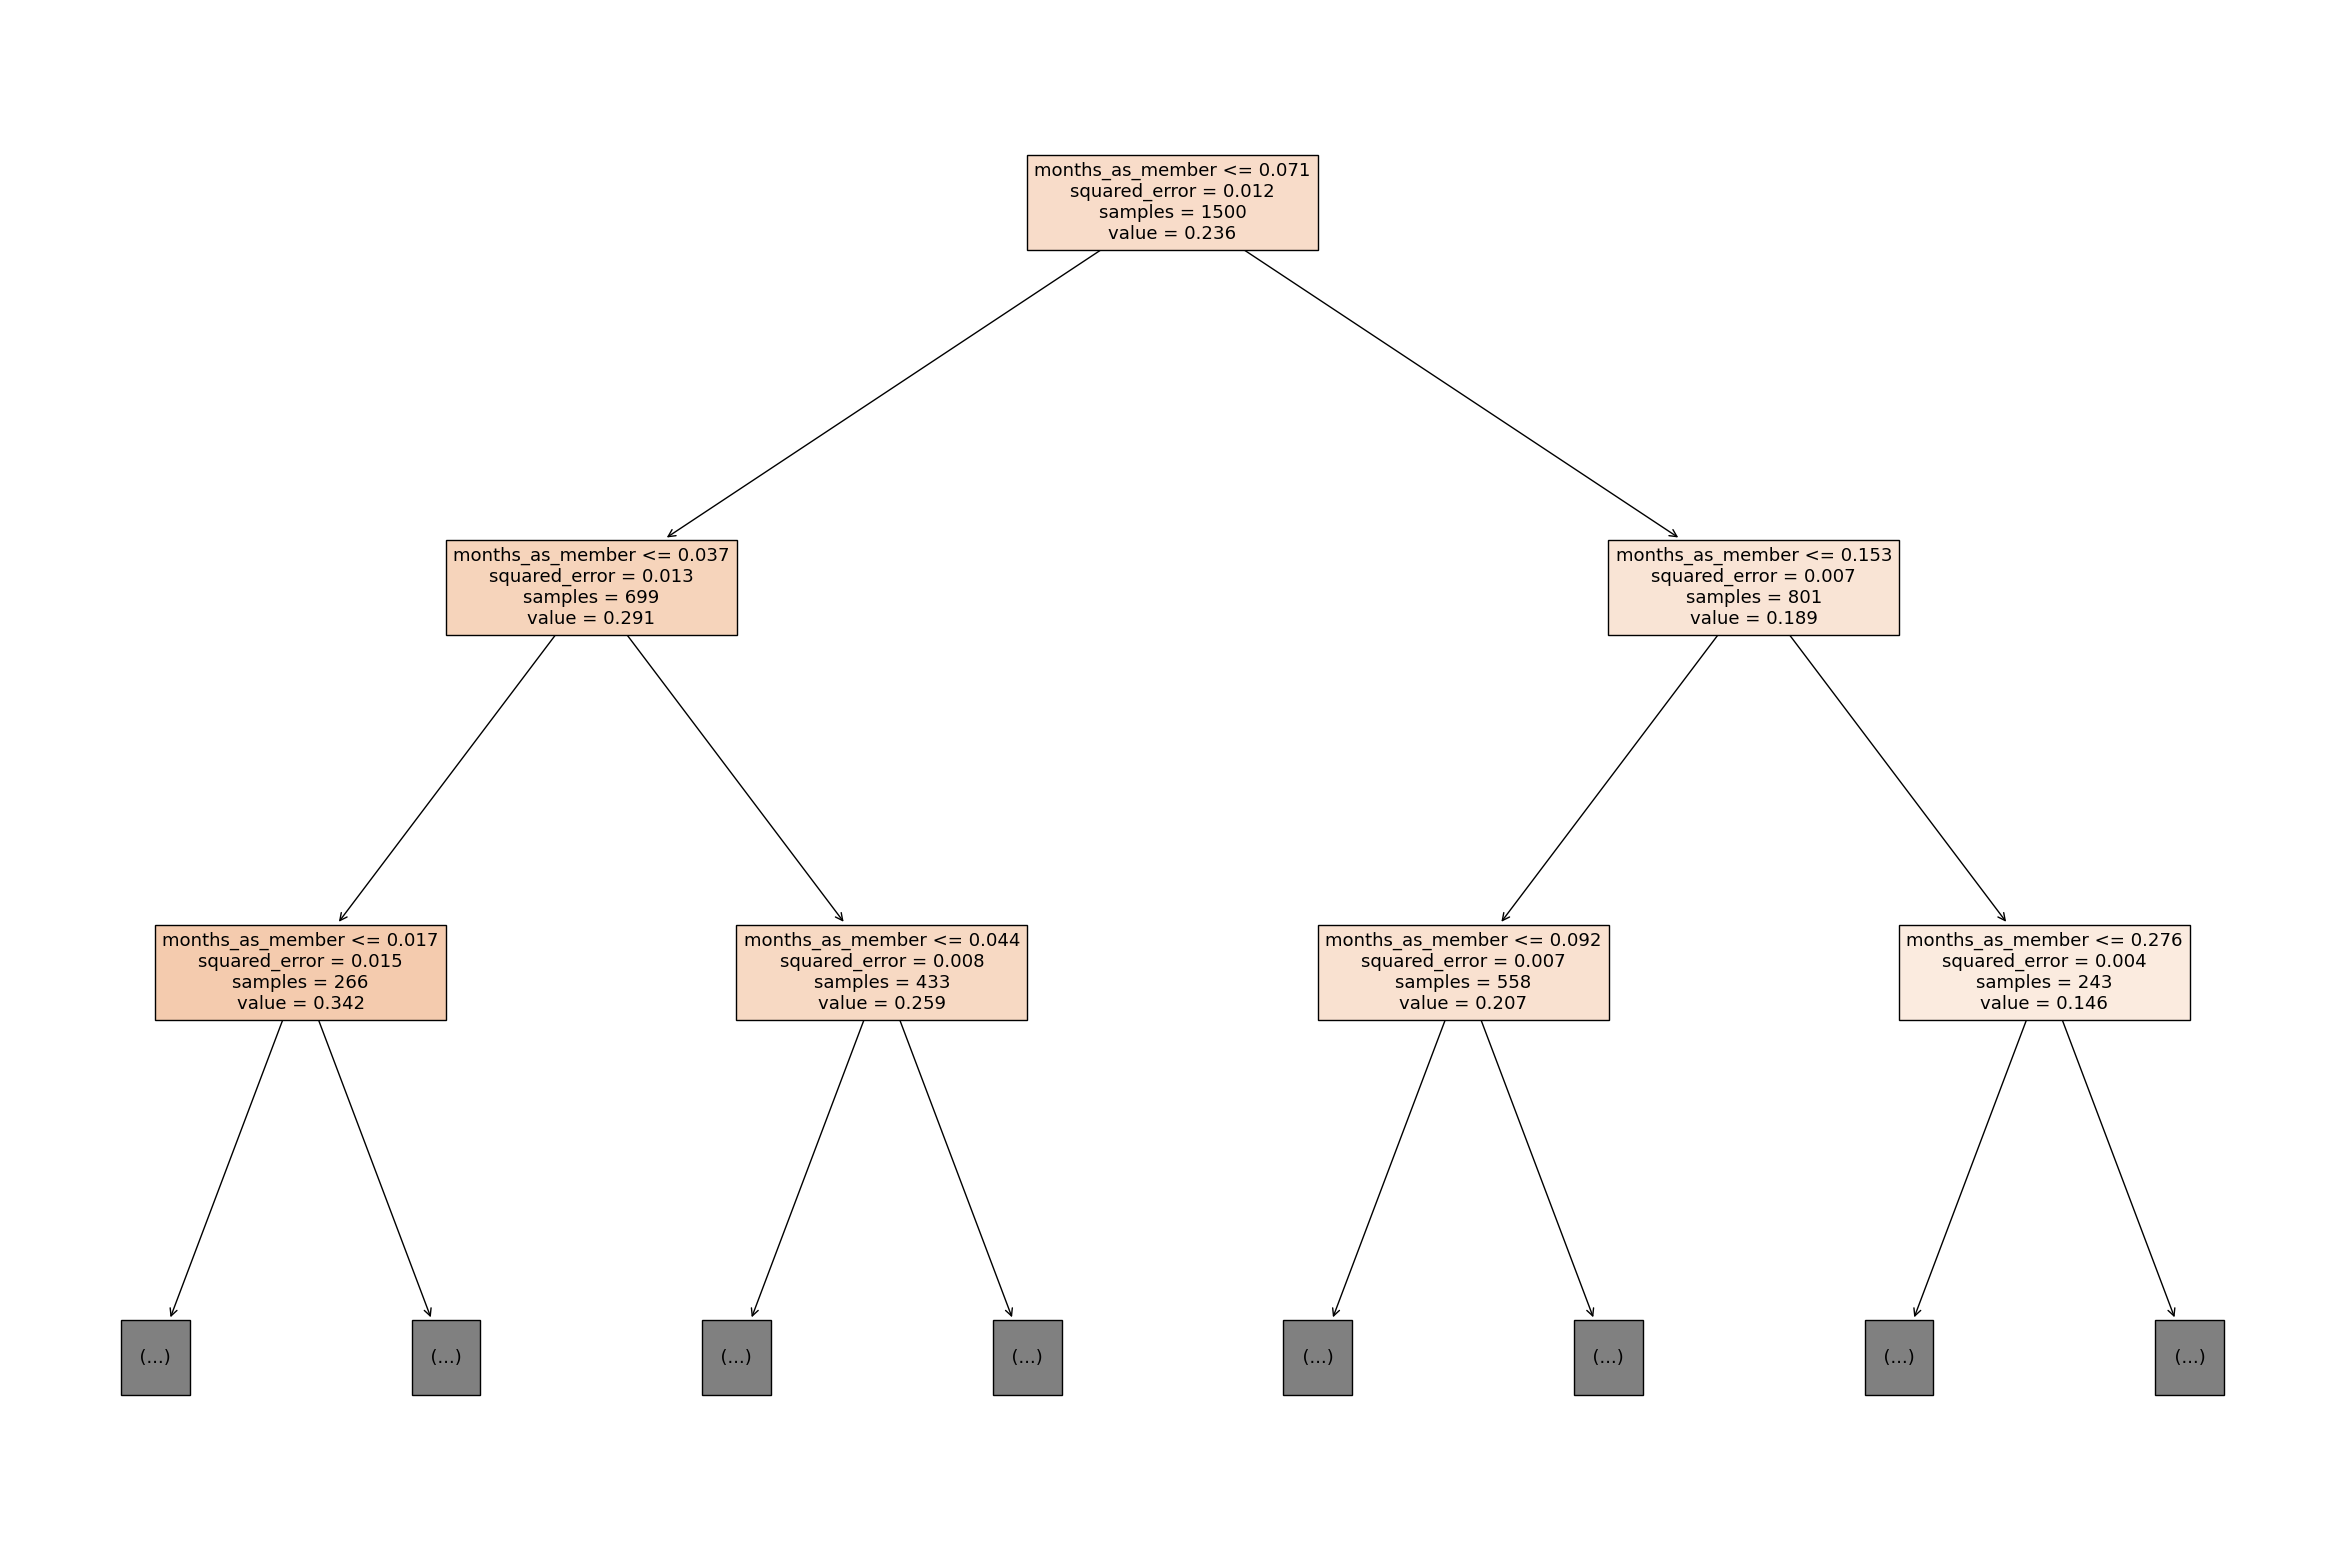

In [82]:
# This is the very left most tree

plt.figure(figsize=(30, 20))
tree = plot_tree(dt_regressor, filled=True, feature_names=X.columns, max_depth=2)
plt.show()

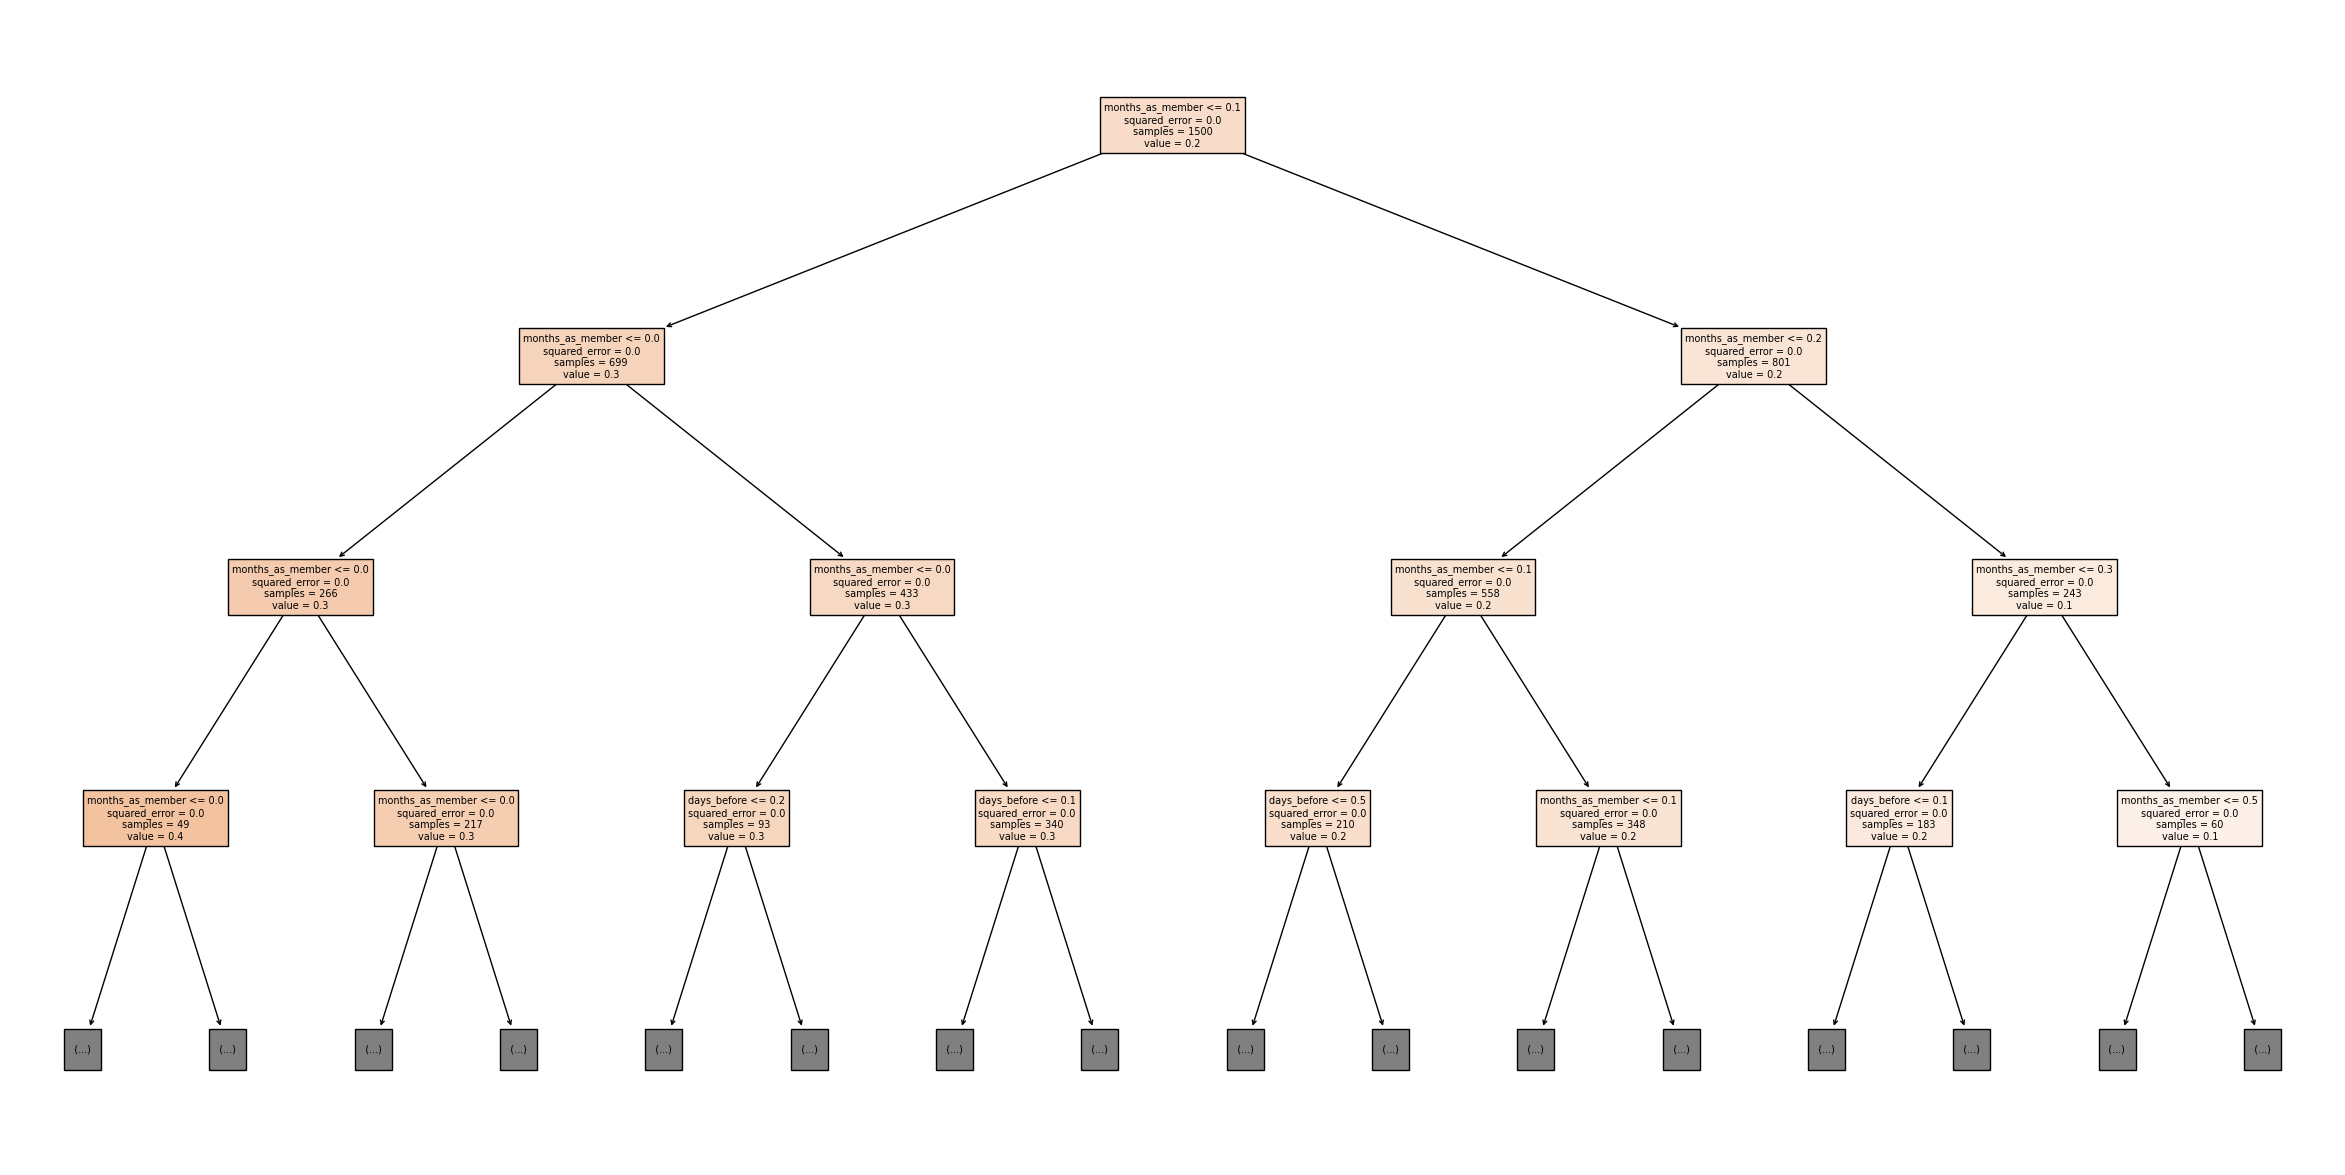

In [83]:
# Right Side of the left most original tree
plt.figure(figsize=(30, 15))
plot_tree(dt_regressor, filled=True, feature_names=X.columns, max_depth=3, precision=1)
plt.show()

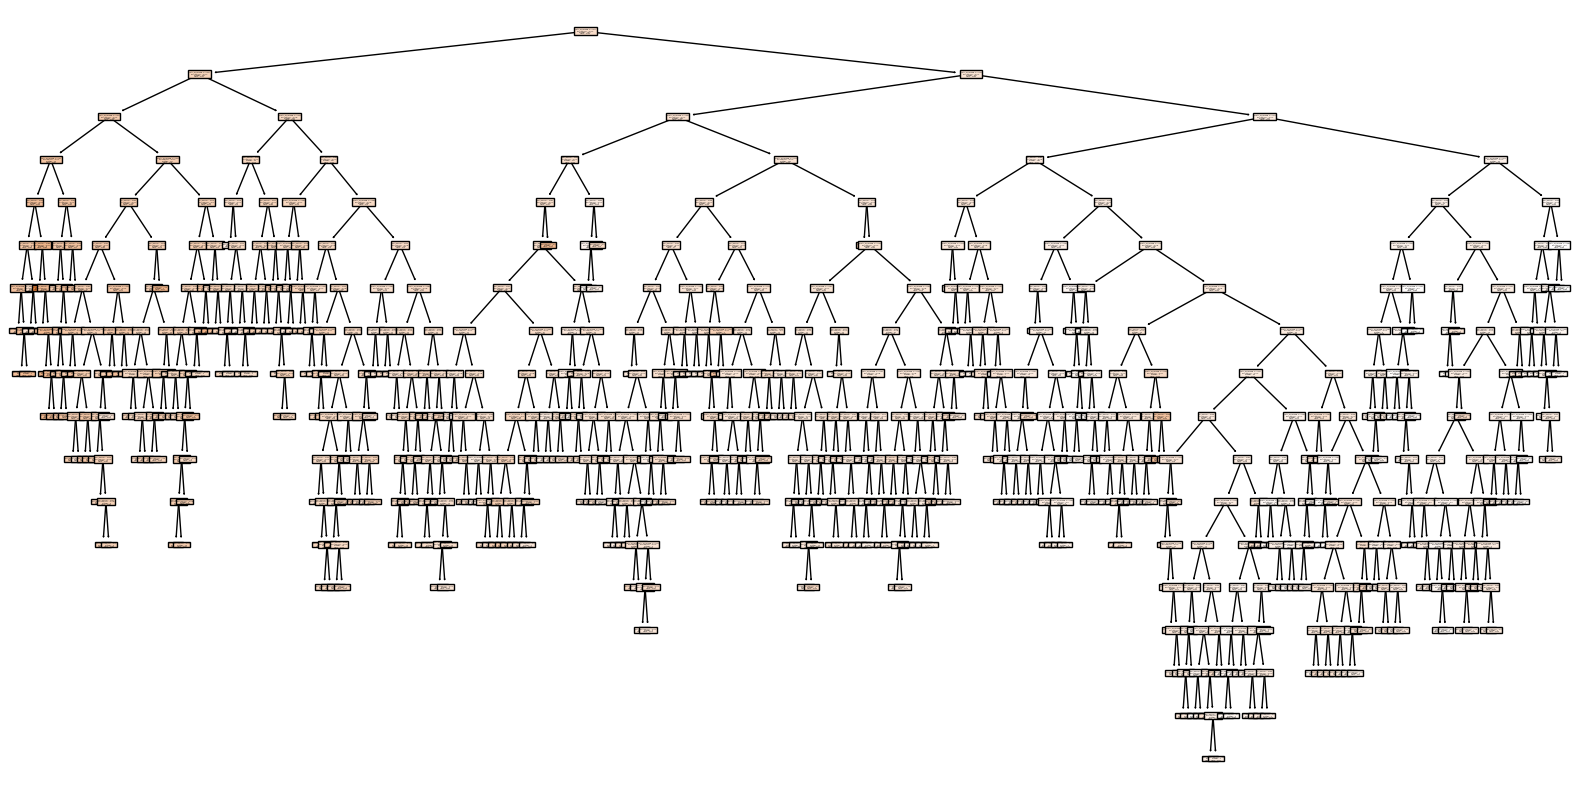

In [84]:
# Get the decision tree structure
tree = dt_regressor.tree_

# Calculate the mean squared error (MSE) for each node
node_mse = [tree.impurity[node] for node in range(tree.node_count)]

# Identify the nodes where the MSE is closer to 1 (adjust the threshold as needed)
threshold = 0.1  # Adjust this threshold as needed
relevant_nodes = [i for i, mse in enumerate(node_mse) if abs(mse - 1.0) < threshold]

# Plot the decision tree focusing on the relevant nodes
plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, filled=True, feature_names=X.columns, node_ids=relevant_nodes)
plt.show()

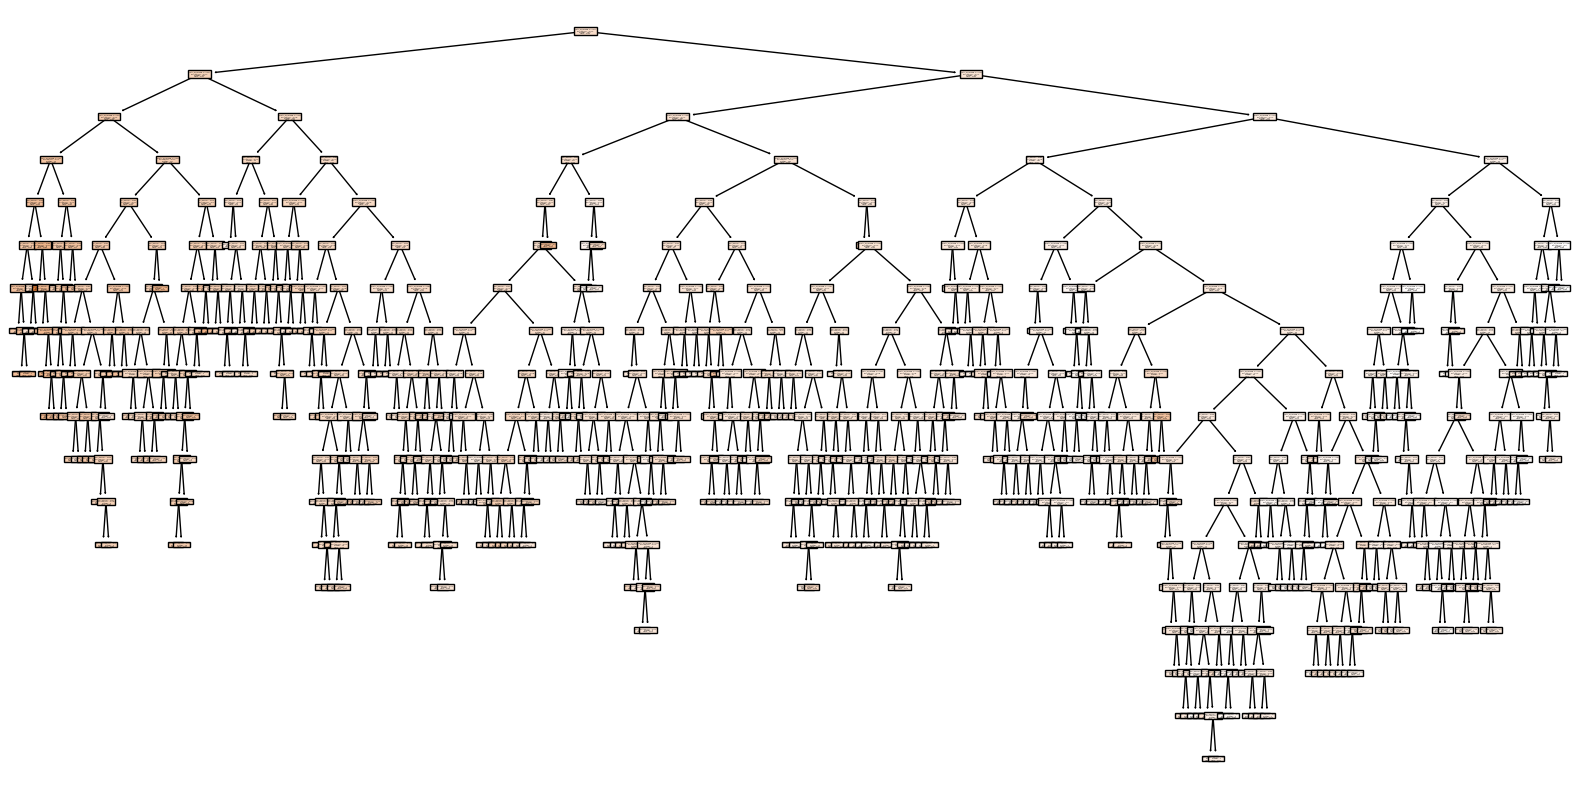

In [85]:
# Define the range for the desired MSE (0.6 to 0.9)
min_mse = 0.6
max_mse = 0.9

# Identify the nodes where the MSE is within the specified range
relevant_nodes = [i for i, mse in enumerate(node_mse) if min_mse <= mse <= max_mse]

# Plot the decision tree focusing on the relevant nodes
plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, filled=True, feature_names=X.columns, node_ids=relevant_nodes)
plt.show()

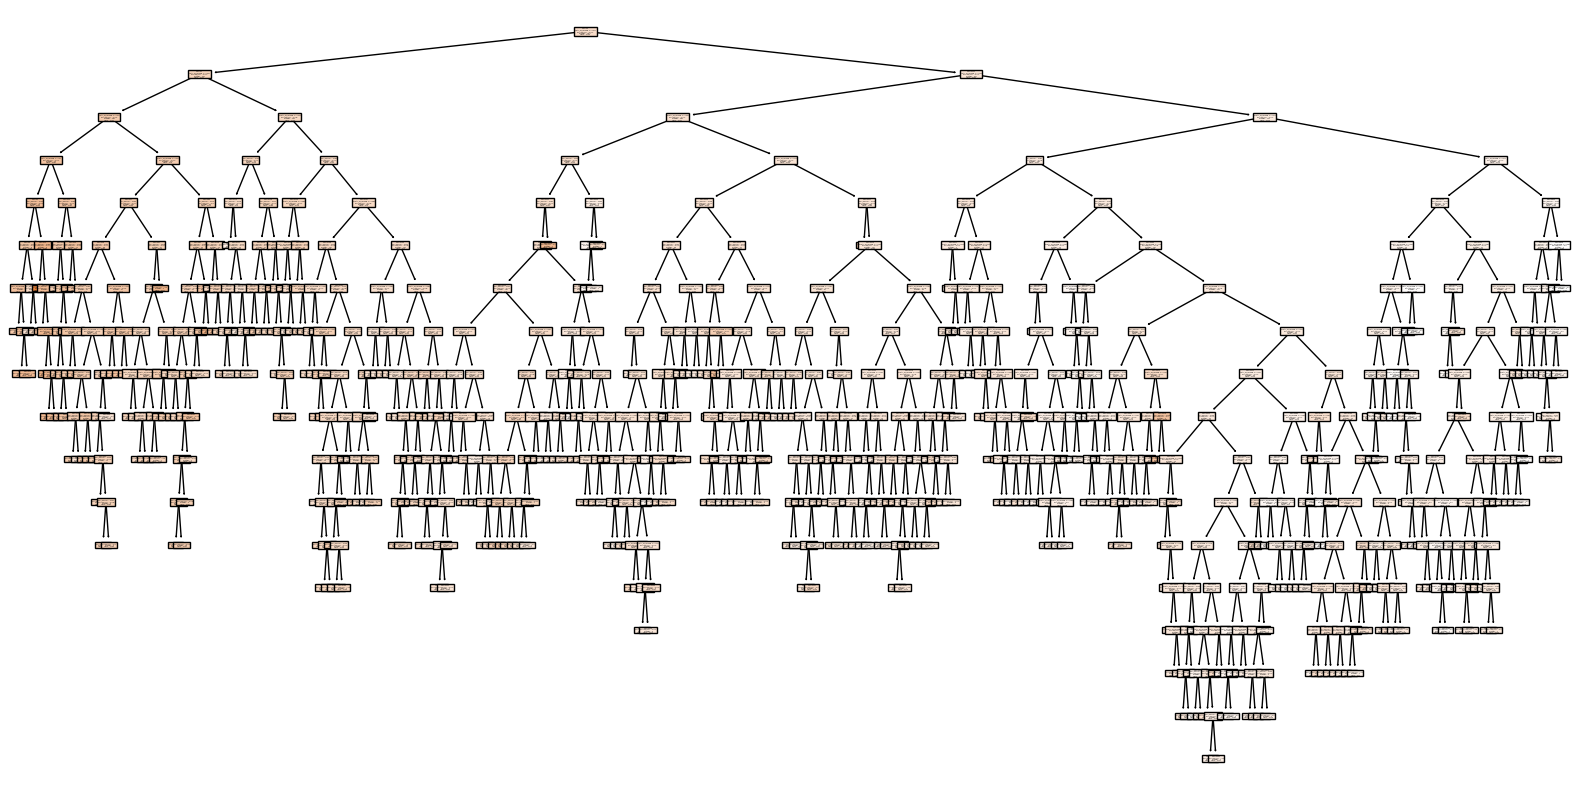

In [86]:
# Find the top 10 nodes with the highest MSE
top_n_nodes = sorted(range(len(node_mse)), key=lambda i: -node_mse[i])[:10]

# Plot the decision tree focusing on the top 10 nodes with the highest MSE
plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, filled=True, feature_names=X.columns, node_ids=top_n_nodes)
plt.show()

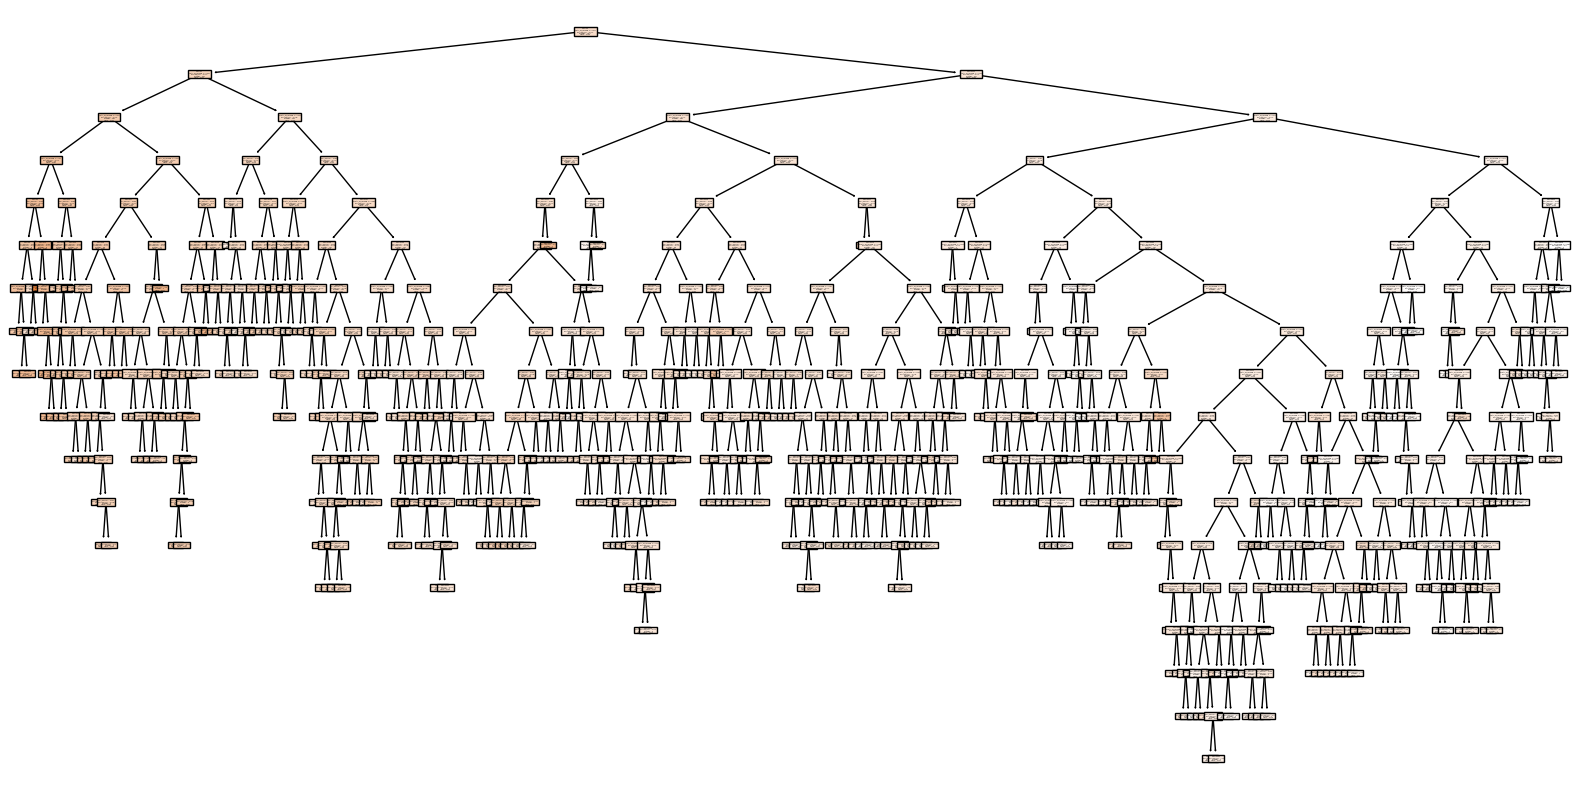

In [87]:
# Calculate the mean squared error (MSE) for each node
node_mse = [tree.impurity[node] for node in range(tree.node_count)]

# Find the indices of the top 10 nodes with the highest MSE
top_n_indices = sorted(range(len(node_mse)), key=lambda i: -node_mse[i])[:10]

# Plot the decision tree focusing on the top 10 nodes with the highest MSE
plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, filled=True, feature_names=X.columns, node_ids=top_n_indices)
plt.show()

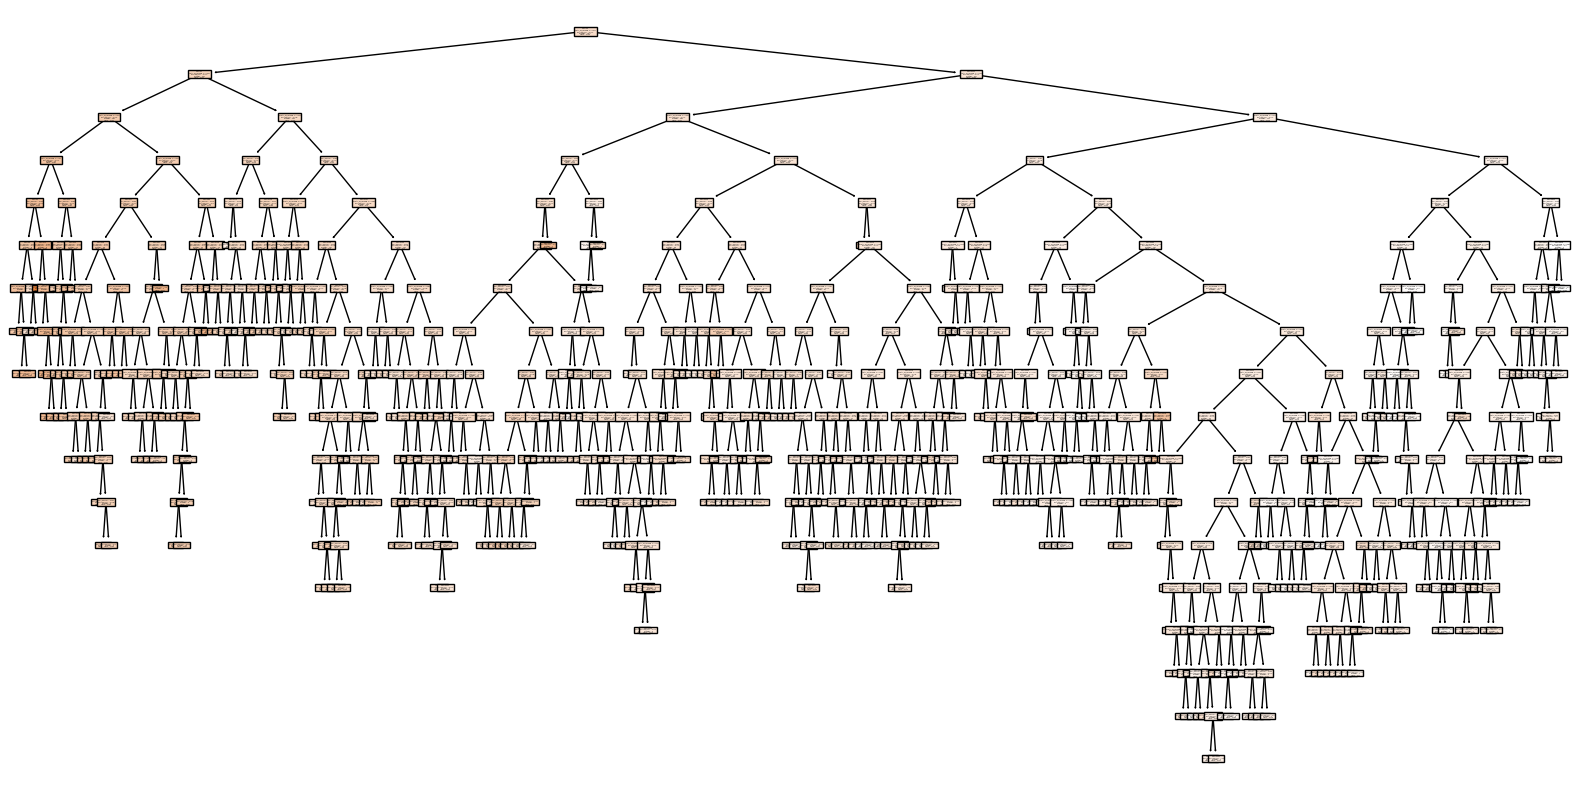

In [88]:
# Find the indices of the top 10 nodes with the highest MSE
top_n_indices = sorted(range(len(node_mse)), key=lambda i: -node_mse[i])[:10]

# Create a list of all node IDs to be displayed
all_node_ids = range(tree.node_count)

# Filter out nodes that are not in the top 10
filtered_node_ids = [node_id for node_id in all_node_ids if node_id in top_n_indices]

# Plot the decision tree focusing on the top 10 nodes with the highest MSE
plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, filled=True, feature_names=X.columns, node_ids=filtered_node_ids)
plt.show()

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
# Create a Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the hyperparameter grid for tuning
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=decision_tree_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator from the grid search
best_params = grid_search.best_params_
best_decision_tree_regressor = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred_dt = best_decision_tree_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the best parameters and evaluation metrics
print("Best Parameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Squared Error (MSE): 0.007888233069774453
R-squared (R2) Score: 0.28831195938052856
Mean Absolute Error (MAE): 0.06754236155068893
Root Mean Squared Error (RMSE): 0.08881572535184551


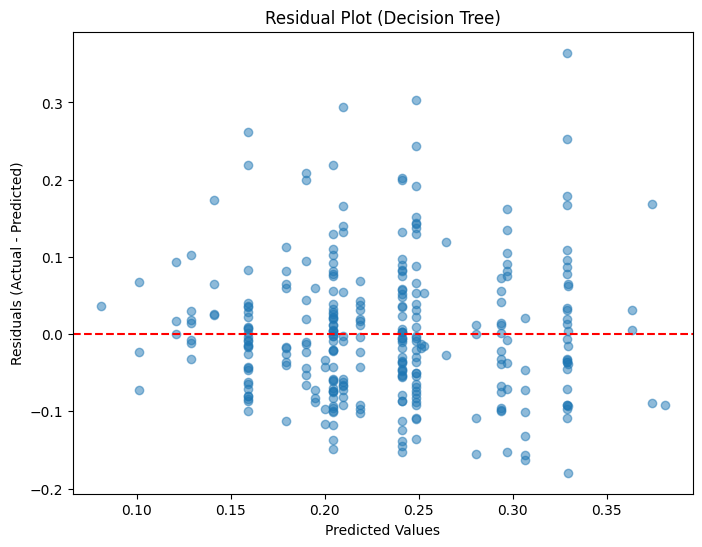

In [91]:

residuals_decision_tree = y_test - y_pred_dt

# Create a residual plot for the Decision Tree model
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_dt, residuals_decision_tree, alpha=0.5)
plt.title('Residual Plot (Decision Tree)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [92]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True, False]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator from the grid search
best_params = grid_search.best_params_
best_rf_regressor = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred_rf = best_rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_rf)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the best parameters and evaluation metrics
print("Best Parameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Mean Squared Error (MSE): 0.007884158031749232
R-squared (R2) Score: 0.28867961533110287
Mean Absolute Error (MAE): 0.06733351332124911
Root Mean Squared Error (RMSE): 0.08879278141689916


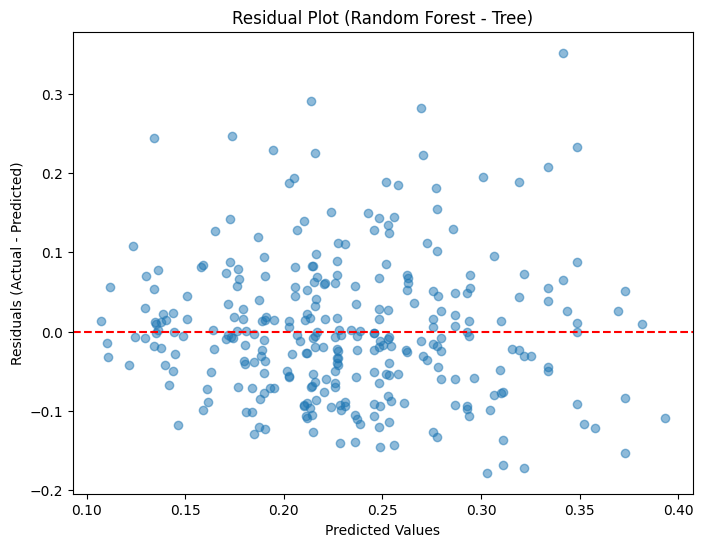

In [93]:
import matplotlib.pyplot as plt


residuals_random_forest = y_test - y_pred_rf

# Create a residual plot for the first tree in the Random Forest model
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, residuals_random_forest, alpha=0.5)
plt.title('Residual Plot (Random Forest - Tree)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [94]:
# Create an AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
adaboost_regressor = AdaBoostRegressor()

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=adaboost_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator from the grid search
best_params = grid_search.best_params_
best_adaboost_regressor = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred_ada = best_adaboost_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ada)
r2 = r2_score(y_test, y_pred_ada)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_ada)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
# Print the best parameters and evaluation metrics
print("Best Parameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Best Parameters: {'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 50}
Mean Squared Error (MSE): 0.007483657086397832
R-squared (R2) Score: 0.32481340226946653
Mean Absolute Error (MAE): 0.06630122295222823
Root Mean Squared Error (RMSE): 0.08650813306503517


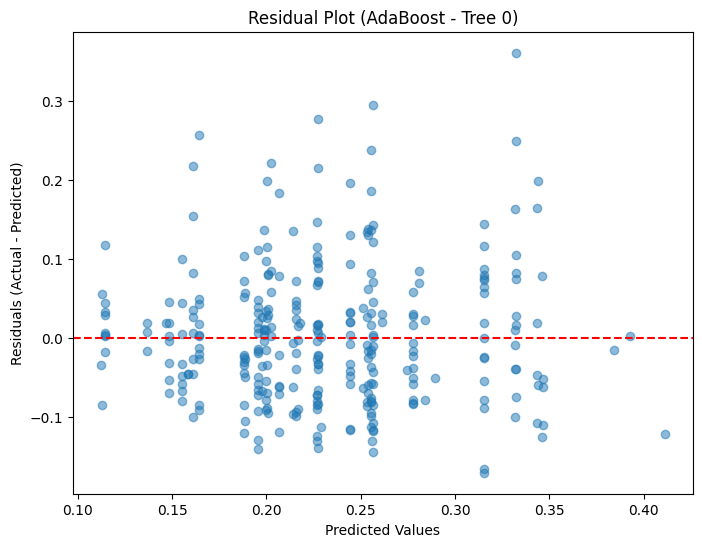

In [95]:
residuals_adaboost = y_test - y_pred_ada

# Create a residual plot for the first tree in the AdaBoost model
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_ada, residuals_adaboost, alpha=0.5)
plt.title('Residual Plot (AdaBoost - Tree 0)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [96]:
# Create an XGBoost Regressor
import xgboost as xgb
xgboost_regressor = xgb.XGBRegressor()

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgboost_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator from the grid search
best_params = grid_search.best_params_
best_xgboost_regressor = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred_xg = best_xgboost_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_xg)
r2 = r2_score(y_test, y_pred_xg)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_xg)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the best parameters and evaluation metrics
print("Best Parameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}
Mean Squared Error (MSE): 0.007658509564740796
R-squared (R2) Score: 0.3090379533687254
Mean Absolute Error (MAE): 0.06679018131193266
Root Mean Squared Error (RMSE): 0.08751291084600486


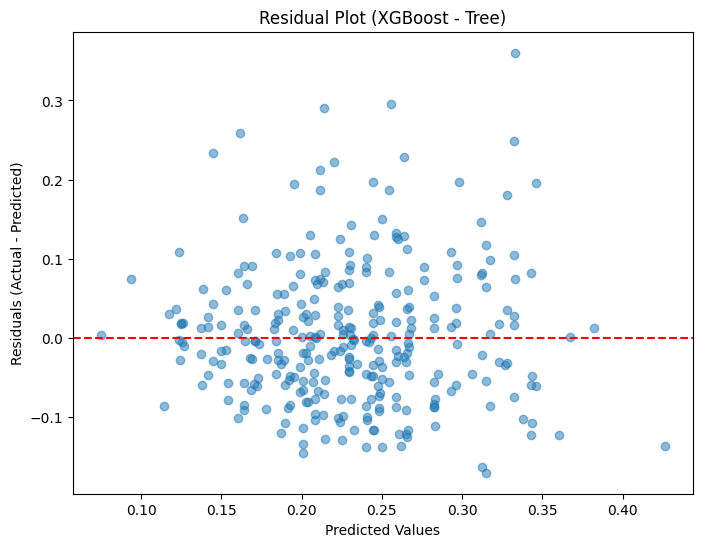

In [97]:
residuals_xgboost = y_test - y_pred_xg

# Create a residual plot for the first tree in the XGBoost model
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_xg, residuals_xgboost, alpha=0.5)
plt.title('Residual Plot (XGBoost - Tree)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

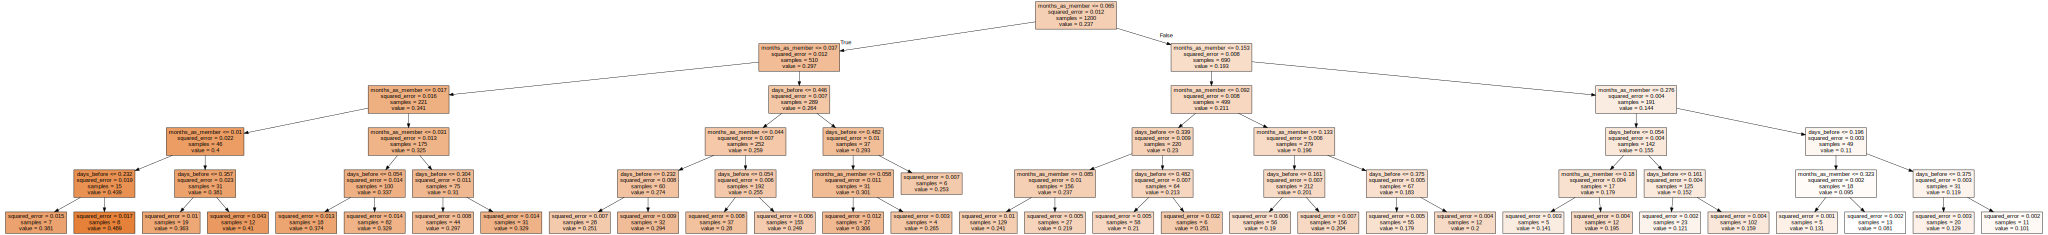

In [98]:
from sklearn.tree import export_graphviz
import graphviz

# Replace 'best_decision_tree_regressor' with the actual best Decision Tree Regressor model
best_decision_tree_regressor.fit(X_train, y_train)

# Visualize the tree
dot_data = export_graphviz(best_decision_tree_regressor, out_file=None, feature_names=X.columns, filled=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree_regressor")
graph.view("decision_tree_regressor")
# Visualize the tree as a PNG image
graph.render("decision_tree_regressor", format='png')

# Display on Google Colab
graph.format = 'png'
graph.render(filename='decision_tree_regressor', format='png', cleanup=True)
graph

In [99]:
from sklearn.tree import export_graphviz
import graphviz

# Replace 'best_rf_regressor' with the actual best Random Forest Regressor model
individual_tree = best_rf_regressor.estimators_[0]

# Visualize the individual tree
dot_data = export_graphviz(individual_tree, out_file=None, feature_names=X.columns, filled=True)
graph = graphviz.Source(dot_data)
graph.render("random_forest_regressor_tree")
graph.view("random_forest_regressor_tree")

'random_forest_regressor_tree.pdf'

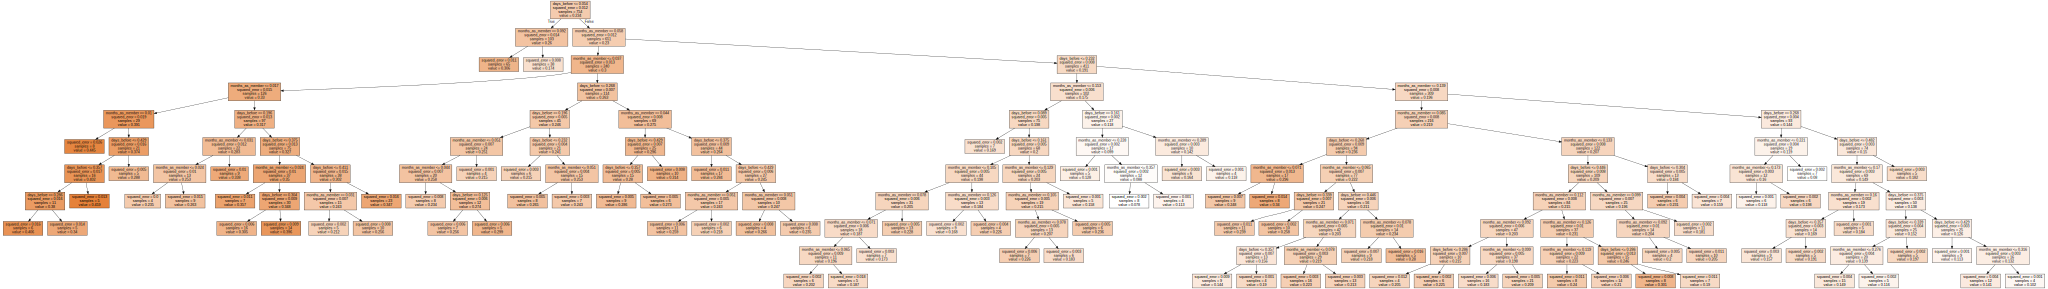

In [100]:
# Visualize the individual tree as a PNG image
graph.render("random_forest_regressor_tree", format='png')

# Display on Google Colab
graph.format = 'png'
graph.render(filename='random_forest_regressor_tree', format='png', cleanup=True)
graph

In [101]:
from sklearn.tree import export_graphviz
import graphviz

# Replace 'best_adaboost_regressor' with the actual best AdaBoost Regressor model
individual_tree = best_adaboost_regressor.estimators_[0]

# Visualize the individual tree
dot_data = export_graphviz(individual_tree, out_file=None, feature_names=X.columns, filled=True)
graph = graphviz.Source(dot_data)
graph.render("adaboost_regressor_tree")
graph.view("adaboost_regressor_tree")

'adaboost_regressor_tree.pdf'

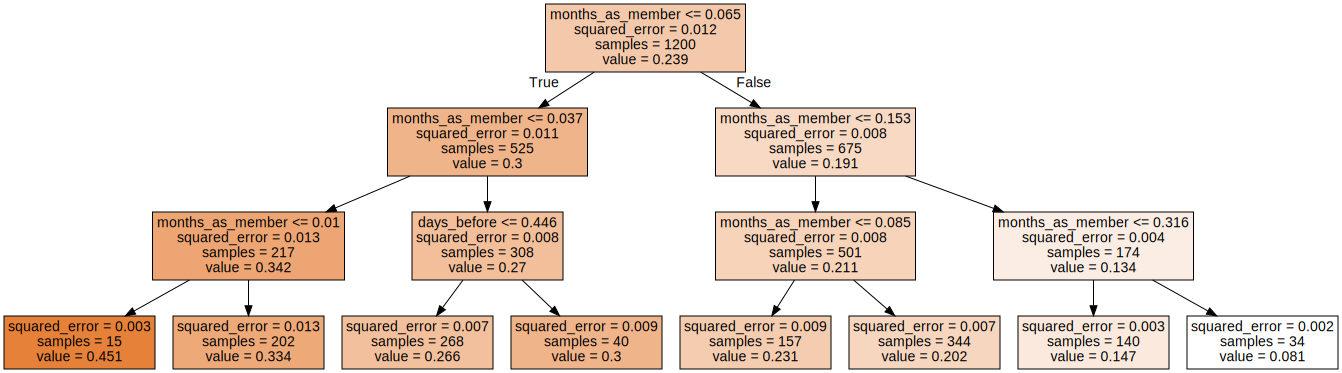

In [102]:
# Visualize the individual tree as a PNG image
graph.render("adaboost_regressor_tree", format='png')

# Display on Google Colab
graph.format = 'png'
graph.render(filename='adaboost_regressor_tree', format='png', cleanup=True)
graph

<Figure size 1e+08x1e+08 with 0 Axes>

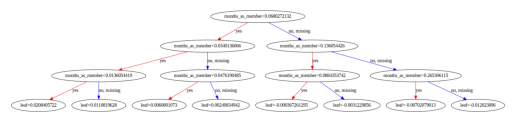

In [103]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Replace 'best_xgboost_regressor' with the actual best XGBoost Regressor model
individual_tree = best_xgboost_regressor.get_booster().get_dump()[0]

# Set the figure size
plt.figure(figsize=(1000000, 1000000))  # Adjust the width and height as needed

# Visualize the individual tree
xgb.plot_tree(booster=best_xgboost_regressor, num_trees=0)
plt.show()
